In [3]:
import rasterio as rio
import rioxarray as rxr
import xarray as xr
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [5]:
def load_monthly_data(folder_path):
    files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')])
    data_arrays = [rxr.open_rasterio(f).squeeze() for f in files]
    combined = xr.concat(data_arrays, dim='month')
    return combined
precip=load_monthly_data("processed_data\climate_dataset\prec")
tmax=load_monthly_data(r"processed_data\climate_dataset\tmax")
tmin=load_monthly_data(r"processed_data\climate_dataset\tmin")

In [8]:
print(precip.coords)
print(precip.shape)
print(precip.attrs)

Coordinates:
  * y            (y) float64 2kB 37.54 37.46 37.38 37.29 ... 19.13 19.04 18.96
  * x            (x) float64 2kB -8.708 -8.625 -8.542 ... 11.79 11.87 11.96
    band         int64 8B 1
    spatial_ref  int64 8B 0
(12, 224, 249)
{'AREA_OR_POINT': 'Area', '_FillValue': np.float32(nan), 'scale_factor': 1.0, 'add_offset': 0.0}


In [26]:
# Flatten values month by month
precip_monthly = [precip.sel(month=i).values.flatten() for i in range(12)]
tmax_monthly = [tmax.sel(month=i).values.flatten() for i in range(12)]
tmin_monthly = [tmin.sel(month=i).values.flatten() for i in range(12)]

### Percipitation

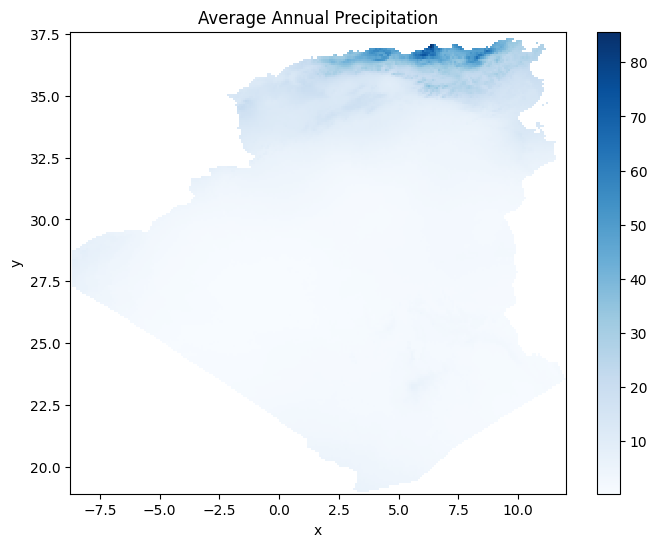

In [33]:
avg_precip = precip.mean(dim="month")
avg_precip.plot(cmap="Blues", figsize=(8,6))
plt.title("Average Annual Precipitation")
plt.show()

In [ ]:
import numpy as np

print("Precipitation stats:")
print("Min:", precip.min().values)
print("Max:", precip.max().values)
print("Mean:", precip.mean().values)
print("Median:", precip.median().values)
values_p=precip.values.flatten()
values_p=values_p[~np.isnan(values_p)]
mode_value_p=stats.mode(values_p, keepdims=True).mode[0]
print("Mode:", mode_value_p)
print("Std:", precip.std().values)
print("Missing values:", np.isnan(precip.values).sum())



Precipitation stats:
Min: 0.0
Max: 266.15
Mean: 5.2938075
Median: 1.7
Mode: 0.0
Std: 11.140009
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_26236\1206320879.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([v[~np.isnan(v)] for v in precip_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)


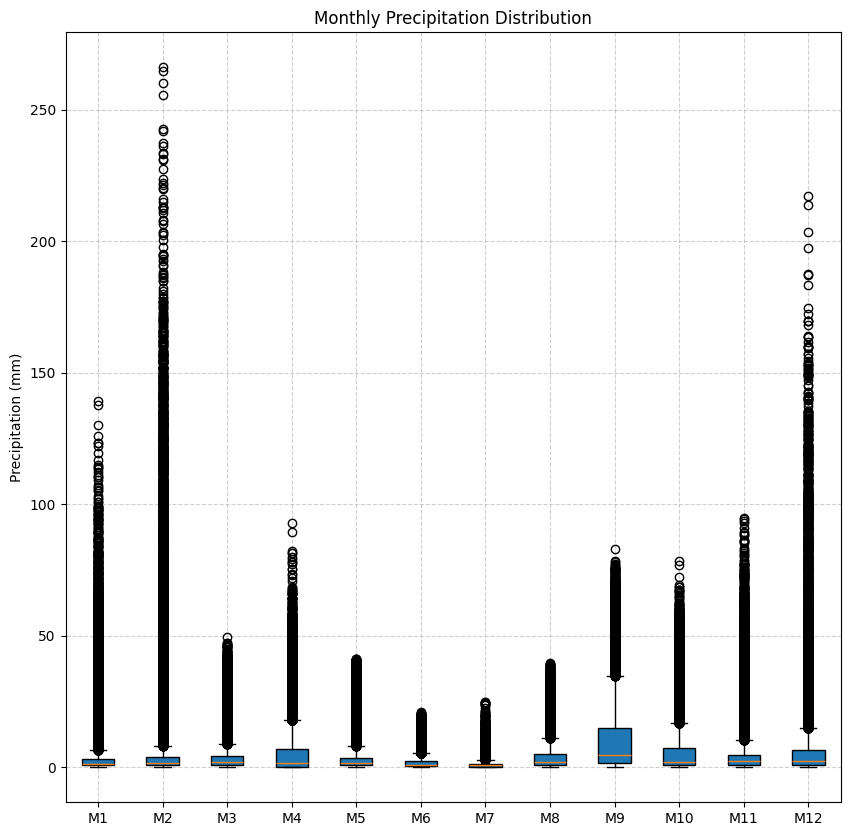

In [27]:
plt.figure(figsize=(10,10))
plt.boxplot([v[~np.isnan(v)] for v in precip_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)
plt.title("Monthly Precipitation Distribution")
plt.ylabel("Precipitation (mm)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

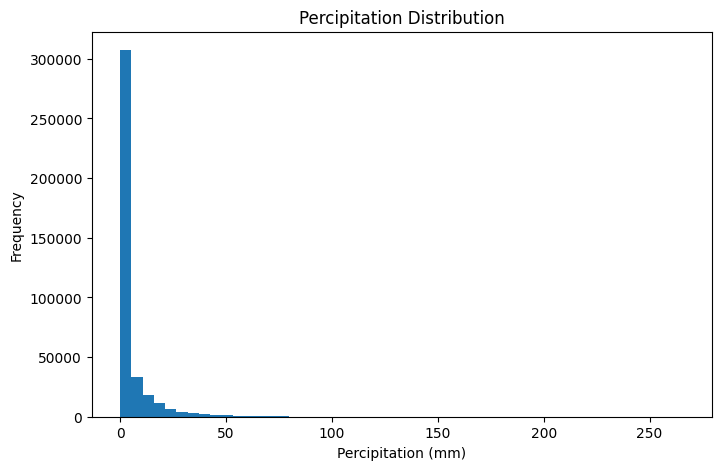

In [28]:
plt.figure(figsize=(8, 5))
precip.plot.hist(bins=50)
plt.title("Percipitation Distribution")
plt.xlabel("Percipitation (mm)")
plt.ylabel("Frequency")
plt.show()

### Tmax

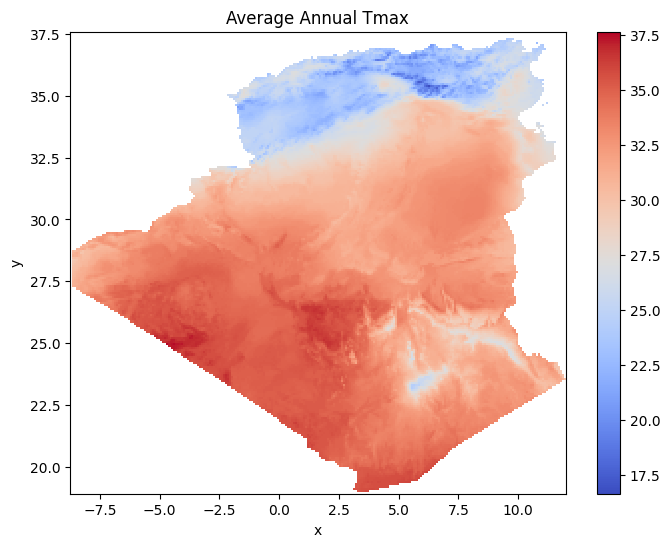

In [35]:
avg_tmax = tmax.mean(dim="month")
avg_tmax.plot(cmap="coolwarm", figsize=(8,6))
plt.title("Average Annual Tmax")
plt.show()

In [24]:
print("\nTmax stats:")
print("Min:", tmax.min().values)
print("Max:", tmax.max().values)
print("Mean:", tmax.mean().values)
print("Median:", tmax.median().values)
values_max=tmax.values.flatten()
values_max=values_max[~np.isnan(values_max)]
mode_value_max=stats.mode(values_max, keepdims=True).mode[0]
print("Mode:", mode_value_max)
print("Std:", tmax.std().values)
print("Missing values:", np.isnan(tmax.values).sum())


Tmax stats:
Min: 5.25
Max: 48.0
Mean: 31.360682
Median: 32.0
Mode: 37.0
Std: 8.545496
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_26236\1448183095.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([v[~np.isnan(v)] for v in tmax_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)


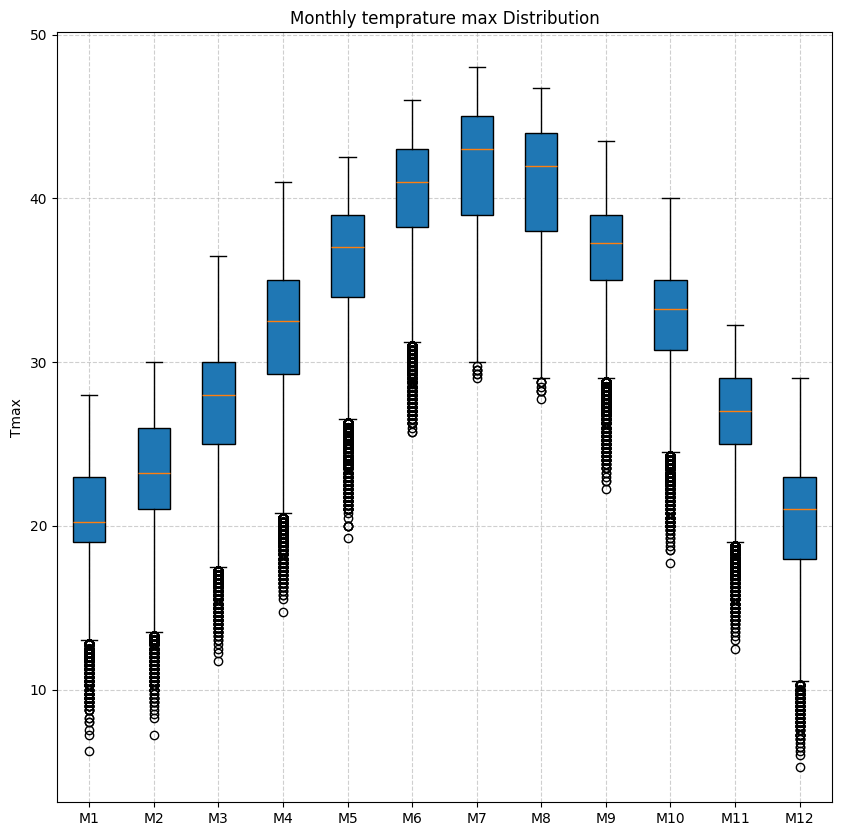

In [29]:
plt.figure(figsize=(10,10))
plt.boxplot([v[~np.isnan(v)] for v in tmax_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)
plt.title("Monthly temprature max Distribution")
plt.ylabel("Tmax")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

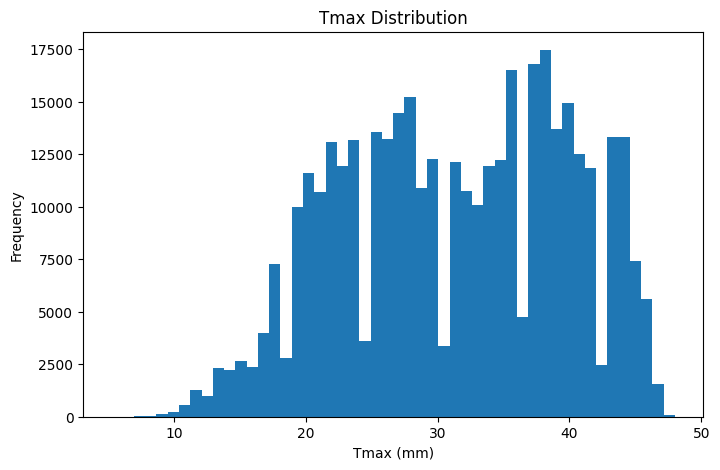

In [31]:
plt.figure(figsize=(8, 5))
tmax.plot.hist(bins=50)
plt.title("Tmax Distribution")
plt.xlabel("Tmax (mm)")
plt.ylabel("Frequency")
plt.show()

### Tmin

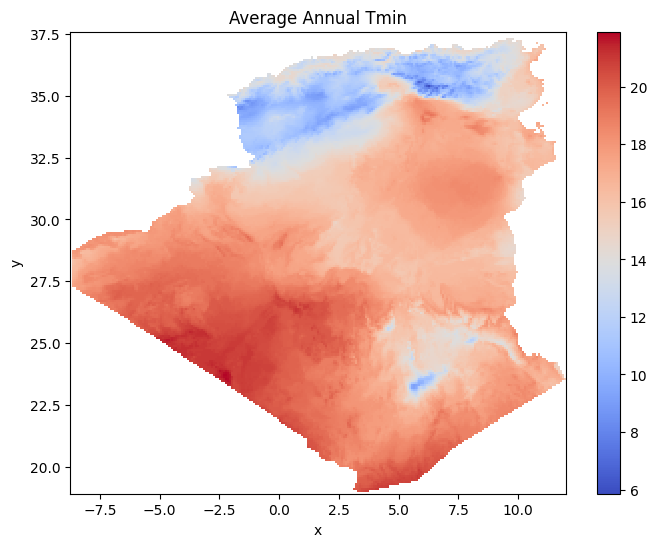

In [36]:
avg_tmin = tmin.mean(dim="month")
avg_tmin.plot(cmap="coolwarm", figsize=(8,6))
plt.title("Average Annual Tmin")
plt.show()

In [25]:
print("\nTmin stats:")
print("Min:", tmin.min().values)
print("Max:", tmin.max().values)
print("Mean:", tmin.mean().values)
print("Median:", tmin.median().values)
values_min=tmin.values.flatten()
values_min=values_min[~np.isnan(values_min)]
mode_value_min=stats.mode(values_min, keepdims=True).mode[0]
print("Mode:", mode_value_min)
print("Std:", tmin.std().values)
print("Missing values:", np.isnan(tmin.values).sum())


Tmin stats:
Min: -2.25
Max: 32.0
Mean: 16.83729
Median: 17.0
Mode: 25.0
Std: 8.058458
Missing values: 275820


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_26236\3724867296.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([v[~np.isnan(v)] for v in tmin_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)


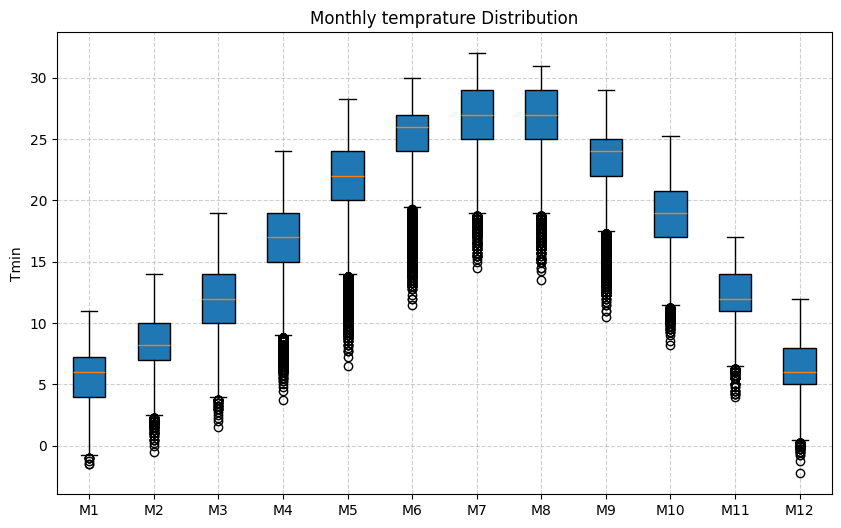

In [15]:
plt.figure(figsize=(10,6))
plt.boxplot([v[~np.isnan(v)] for v in tmin_monthly], labels=[f"M{i+1}" for i in range(12)], patch_artist=True)
plt.title("Monthly temprature Distribution")
plt.ylabel("Tmin")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

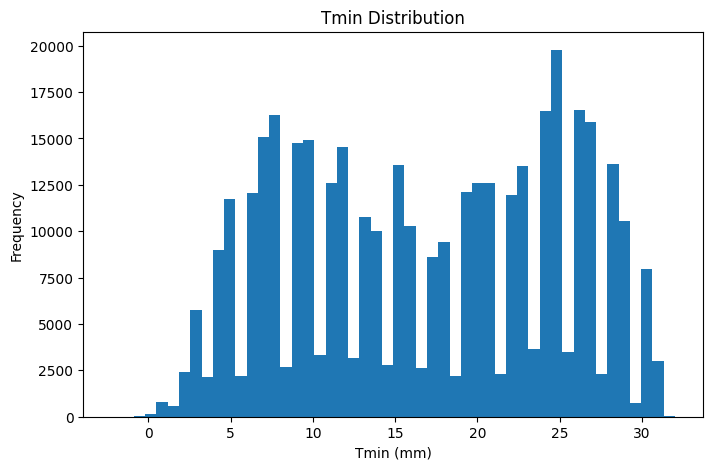

In [32]:
plt.figure(figsize=(8, 5))
tmin.plot.hist(bins=50)
plt.title("Tmin Distribution")
plt.xlabel("Tmin (mm)")
plt.ylabel("Frequency")
plt.show()